## KNN

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

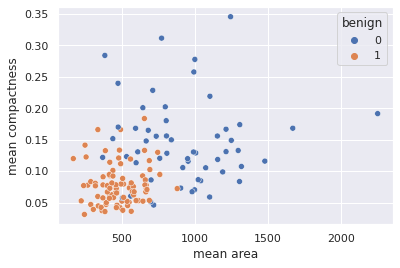

In [ ]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

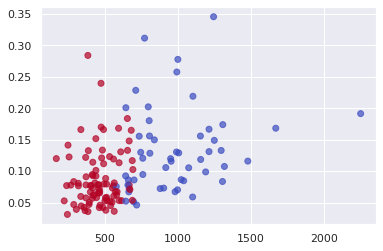

In [ ]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])

In [ ]:
accuracy_score(y_test,y_pred) * 100

84.61538461538461


## KD Tree

In [ ]:
Z = [(1,9),(2,3),(4,1),(3,7),(5,4),(6,8),(7,2),(8,8),(7,9),(9,6)]

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(algorithm = 'kd_tree')

neigh.fit(Z)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
neigh.kneighbors([[7,4]],3, return_distance=False)

array([[6, 4, 9]])

In [ ]:
Z[6], Z[4], Z[9]

((7, 2), (5, 4), (9, 6))

## Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
#reading the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


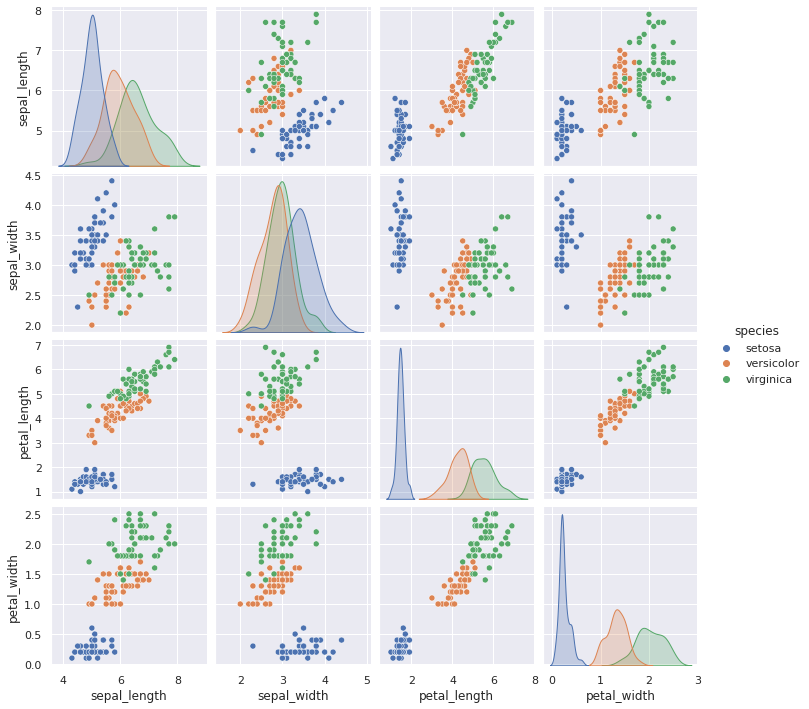

In [ ]:
sns.pairplot(data=df, hue = 'species')

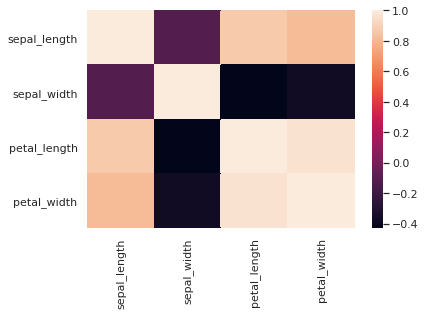

In [ ]:
# correlation matrix
sns.heatmap(df.corr())

In [ ]:
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)
df1.shape

(150, 4)

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X=df1
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y = target

In [ ]:

# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


In [ ]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

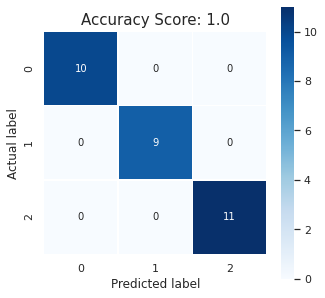

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

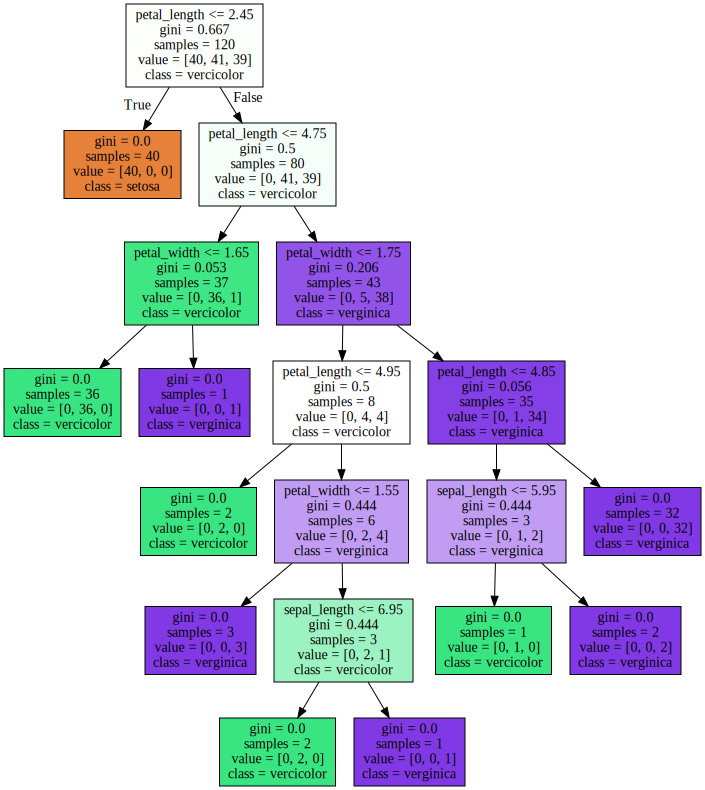

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dtree,feature_names = df1.columns,class_names =["setosa", "vercicolor", "verginica"], filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls

drive  sample_data


In [ ]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
!ls

car_evaluation.csv


In [ ]:
df = pd.read_csv('car_evaluation.csv', header=None)

In [ ]:
df.shape

(1728, 7)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.2MB/s 


In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


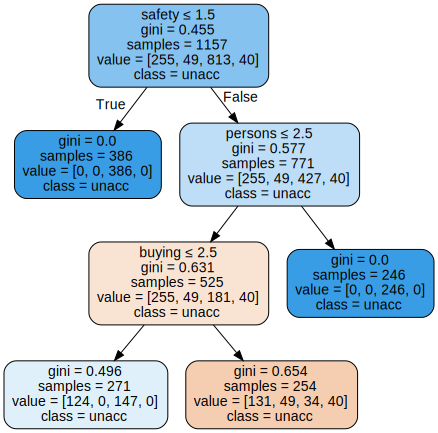

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


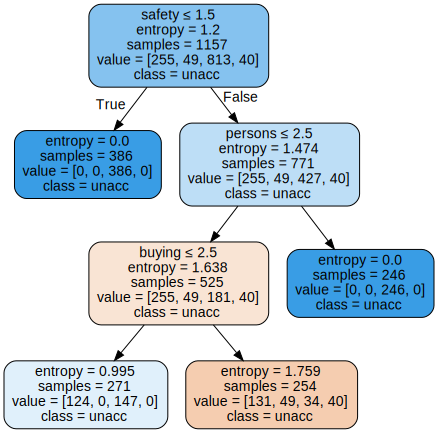

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
# load dataset
data = load_wine()
# feature matrix
X = data.data
# target vector
y = data.target
# class labels
labels = data.feature_names
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
  estimator = DecisionTreeClassifier(random_state = 0 , criterion = crit, splitter = split, max_depth = depth, min_samples_split=min_split, min_samples_leaf=min_leaf)
  estimator.fit(X, y)
  graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=labels
      , class_names=['0', '1', '2']
      , filled = True))
  display(SVG(graph.pipe(format='svg')))
  return estimator
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Naive Bayes

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [ ]:
# Load the dataset
data = fetch_20newsgroups()
# Get the text categories
text_categories = data.target_names
# define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
# define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [ ]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


In [ ]:
print(test_data.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [ ]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.data, train_data.target)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.data)

In [ ]:
print(np.array(test_data.target_names)[predicted_categories])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


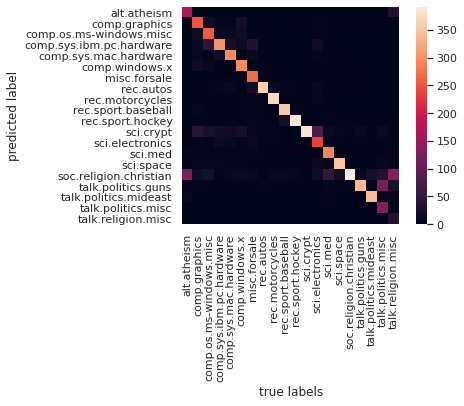

The accuracy is 0.7738980350504514


In [ ]:
# plot the confusion matrix
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=False, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))

## Support Vector Machine

In [ ]:
from sklearn import datasets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] # we will only focus on Iris-setosa and Iris-Versicolor
data.head()

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


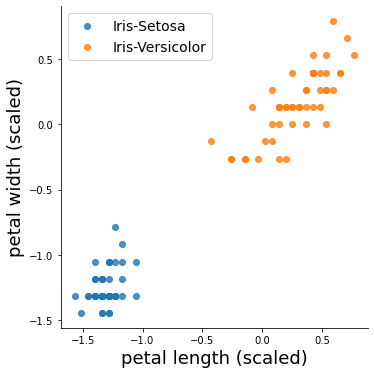

In [ ]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [ ]:
svc = LinearSVC(C=1,loss="hinge")
svc.fit(data[['petal length','petal width']].values,data['target'].values)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [ ]:
# get the parameters
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# decision boundary
x1_decision = -b/w1 - w0/w1*x0
# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

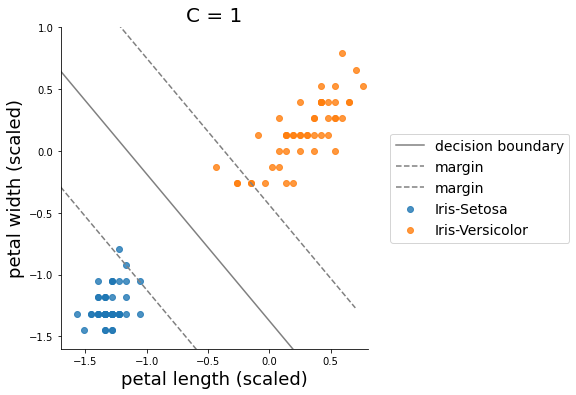

In [ ]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.title('C = 1', fontsize = 20)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

In [ ]:
svc = LinearSVC(C=1000,loss="hinge") # let's change C to a much larger value
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# get the parameters
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# decision boundary
x1_decision = -b/w1 - w0/w1*x0
# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

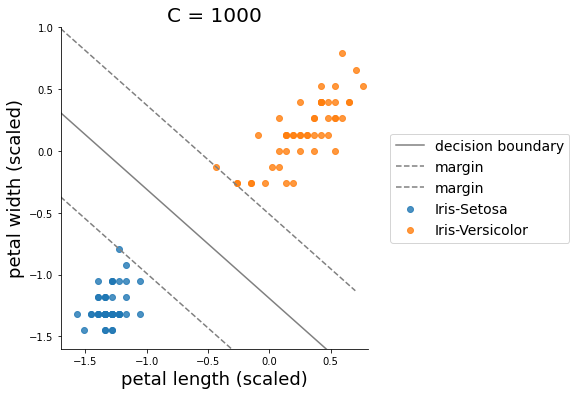

In [ ]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.title('C = 1000', fontsize = 20)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

In [ ]:
from sklearn.datasets import make_moons
X,y=make_moons(noise=0.1, random_state=2) # fix random_state to make sure it produces the same dataset everytime. Remove it if you want randomized dataset.
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

,x1,x2,y
0,1.327241,-0.222425,1
1,-0.429116,1.071136,0
2,0.014901,0.003679,1
3,0.000352,1.087226,0
4,0.676553,0.857039,0


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


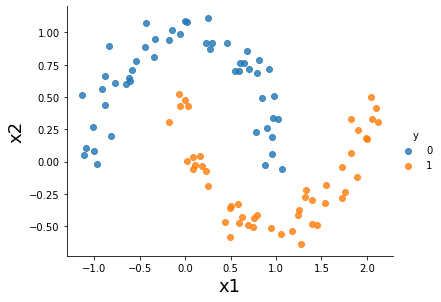

In [ ]:
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

In [ ]:
print('Shape of X before tranformation:', X.shape)
poly = PolynomialFeatures(degree = 3, include_bias=False)
Xpoly = poly.fit_transform(X)
print('Shape of X aftere tranformation:', Xpoly.shape)

Shape of X before tranformation: (100, 2)
Shape of X aftere tranformation: (100, 9)


In [ ]:
# standardize the data
scaler = StandardScaler()
Xpolystan = scaler.fit_transform(Xpoly)

In [ ]:
svm_clf = LinearSVC(C=10,loss='hinge',max_iter=10000)
svm_clf.fit(Xpolystan,y)
print(svm_clf.intercept_, svm_clf.coef_)

[0.14734367] [[-1.48196435 -0.38932526 -3.63173654 -0.24404943  0.84164139  6.20766904
  -0.98199674  0.70830288 -1.94867883]]


In [ ]:
# preparing to plot decision boundary of the classifier
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# polynomial transformation and standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridpoly = poly.transform(xgrid)
xgridpolystan = scaler.transform(xgridpoly)
# prediction
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


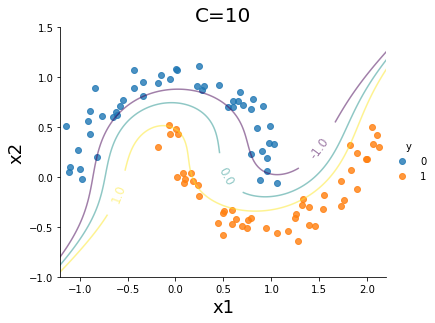

In [ ]:
# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', fontsize=12, manual=[(1.5,0.3),(0.5,0.0),(-0.5,-0.2)])
#
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=10', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


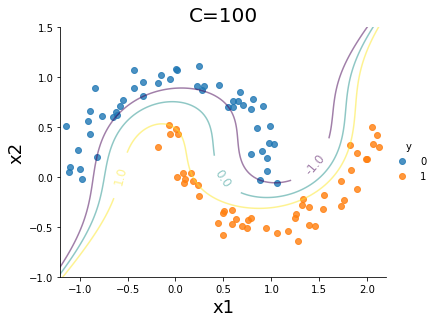

In [ ]:
svm_clf = LinearSVC(C=100,loss='hinge',max_iter=10000)
svm_clf.fit(Xpolystan,y)

# prediction
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', fontsize=12, manual=[(1.5,0.1),(0.5,0.0),(-0.5,0.0)])
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=100', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

## Model Evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls

drive  sample_data


In [ ]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


Converting categorical variables to numeric...


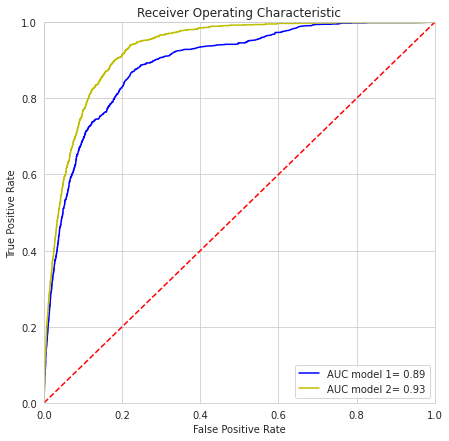

In [ ]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score
sns.set_style("whitegrid")
%matplotlib inline
 
#Import data
df = pd.read_csv('bank-full.csv', sep=';')
 
#Encode categorical variables
print('Converting categorical variables to numeric...')
 
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
'loan', 'contact', 'day', 'month', 'campaign',
'previous', 'poutcome']
 
use_cols = ['month', 'campaign', 'y']
 
df['y'] = df['y'].map({'yes':1, 'no':0})
 
for c in categorical_columns:
  df[c] = df[c].astype('category')
  df[c] = df[c].cat.codes
 
#Split in 75% train and 25% test set
train_df, test_df = train_test_split(df, test_size = 0.25, random_state= 1984)
 
#Separate target label
train_y = train_df['y']
test_y = test_df['y']
 
#Drop target label
train_x = train_df.drop(['y'], axis = 1)
test_x = test_df.drop(['y'], axis = 1)
 
#Build Random Forest model
model1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
model1.fit(train_x,train_y)
model2 = RandomForestClassifier(max_depth=12, n_estimators = 120)
model2.fit(train_x,train_y)
 
#Predict test set
pred1 = model1.predict_proba(test_x)
pred2 = model2.predict_proba(test_x)
 
#Plot AUC-ROC
fpr1, tpr1, threshold1 = roc_curve(test_y, pred1[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(test_y, pred2[:,1])
roc_auc2 = auc(fpr2, tpr2)
 
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'y', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
!pip install scikit-plot

<Figure size 504x504 with 0 Axes>

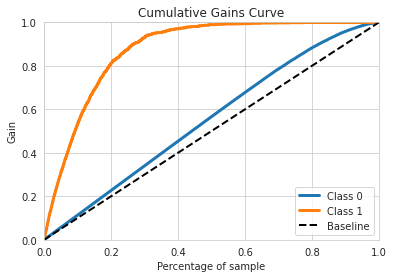

In [ ]:
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(test_y, pred2)
plt.show()

<Figure size 504x504 with 0 Axes>

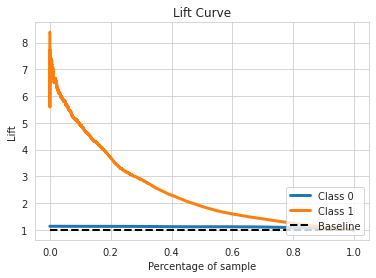

In [ ]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(test_y, pred1)
plt.show()